# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("C:/Users/patel/lighthouse-lab-allprojects/mini-project-IV/mini-project-IV/data/mini_project-IV.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [133]:
# Retrieve the column names
columns = df.columns

# Iterate over each column and check for null values
columns_with_null = []
for column in columns:
    if df[column].isnull().any():
        columns_with_null.append(column)

# Print the columns with null values
print("Columns with null values:")
for column in columns_with_null:
    print(column)

Columns with null values:
Gender
Married
Dependents
Self_Employed
LoanAmount
Loan_Amount_Term
Credit_History


In [134]:
from sklearn.impute import SimpleImputer
# Identify numeric and object columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
object_cols = df.select_dtypes(include=['object']).columns

# Impute missing values with mean for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values with mode for object columns
object_imputer = SimpleImputer(strategy='most_frequent')
df[object_cols] = object_imputer.fit_transform(df[object_cols])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [136]:
credit_history_count = df[df['Credit_History'] == 1]['Credit_History'].count()
print("Number of applicants with a Credit History:", credit_history_count)


Number of applicants with a Credit History: 475


In [137]:
# Checking ApplicantIncome distribution
income_mean = df['ApplicantIncome'].mean()
income_median = df['ApplicantIncome'].median()
print("Mean ApplicantIncome:", income_mean)
print("Median ApplicantIncome:", income_median)


Mean ApplicantIncome: 5403.459283387622
Median ApplicantIncome: 3812.5


In [138]:
# Checking CoapplicantIncome distribution
coincome_mean = df['CoapplicantIncome'].mean()
coincome_median = df['CoapplicantIncome'].median()
print("Mean CoapplicantIncome:", coincome_mean)
print("Median CoapplicantIncome:", coincome_median)

Mean CoapplicantIncome: 1621.2457980271008
Median CoapplicantIncome: 1188.5


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [139]:
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in Loan_ID: 614
Number of unique values in Gender: 2
Number of unique values in Married: 2
Number of unique values in Dependents: 4
Number of unique values in Education: 2
Number of unique values in Self_Employed: 2
Number of unique values in Property_Area: 3
Number of unique values in Loan_Status: 2


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [70]:
categorical_columns = df.select_dtypes(include='object').columns.drop('Loan_ID')

for column in categorical_columns:
    category_counts = df[column].value_counts()
    print(f"Frequency of categories in {column}:")
    print(category_counts)
    print()

Frequency of categories in Gender:
Male      502
Female    112
Name: Gender, dtype: int64

Frequency of categories in Married:
Yes    401
No     213
Name: Married, dtype: int64

Frequency of categories in Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of categories in Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of categories in Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64

Frequency of categories in Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of categories in Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64



In [71]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



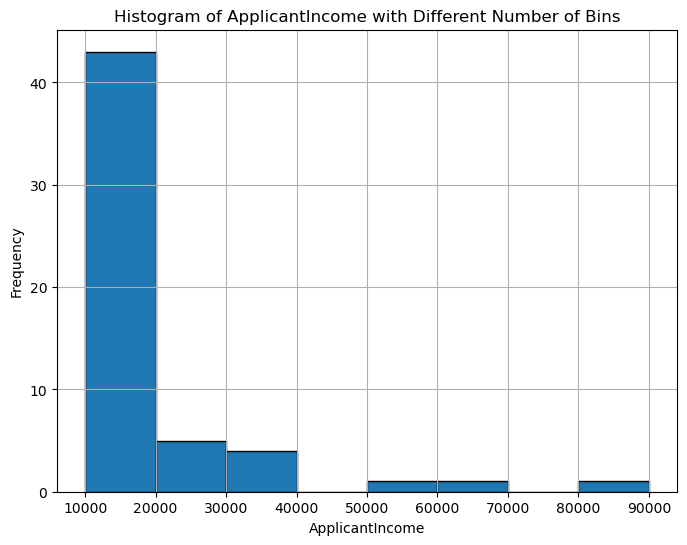

In [72]:
import matplotlib.pyplot as plt

applicant_income = df['ApplicantIncome']

# Plot histogram with different number of bins
bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000]  # Specify the number of bins here

plt.figure(figsize=(8, 6))
plt.hist(applicant_income, bins=bins, edgecolor='black')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Histogram of ApplicantIncome with Different Number of Bins')
plt.grid(True)
plt.show()

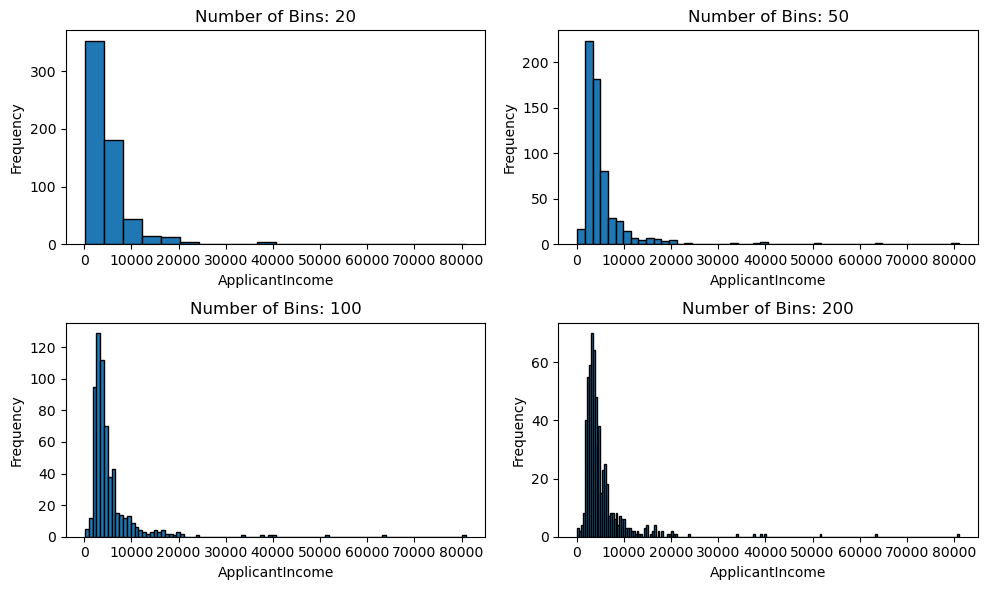

In [75]:
# Plot histogram with different numbers of bins
bins = [20, 50, 100, 200]  # Define different bin sizes

plt.figure(figsize=(10, 6))
for i, bin_size in enumerate(bins):
    plt.subplot(2, 2, i+1)
    plt.hist(applicant_income, bins=bin_size, edgecolor='black')
    plt.title(f'Number of Bins: {bin_size}')
    plt.xlabel('ApplicantIncome')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [76]:
# Save the graph to a file (e.g., PNG, PDF, or SVG)
plt.savefig('graph.png')


<Figure size 640x480 with 0 Axes>


Look at box plots to understand the distributions. 

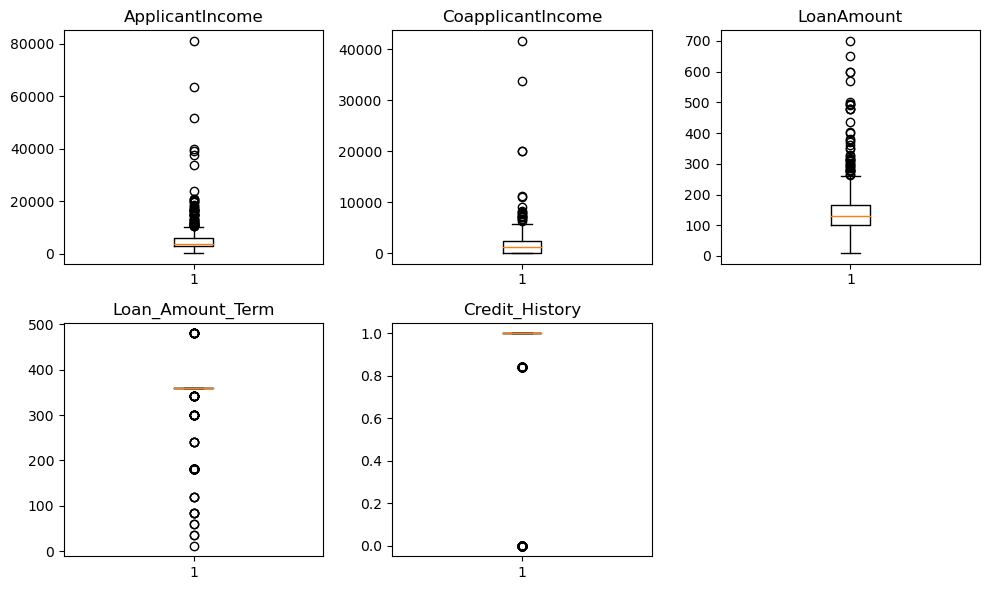

In [77]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [78]:
# Save the graph to a file
plt.savefig('graph.png')

<Figure size 640x480 with 0 Axes>

Look at the distribution of income segregated  by `Education`

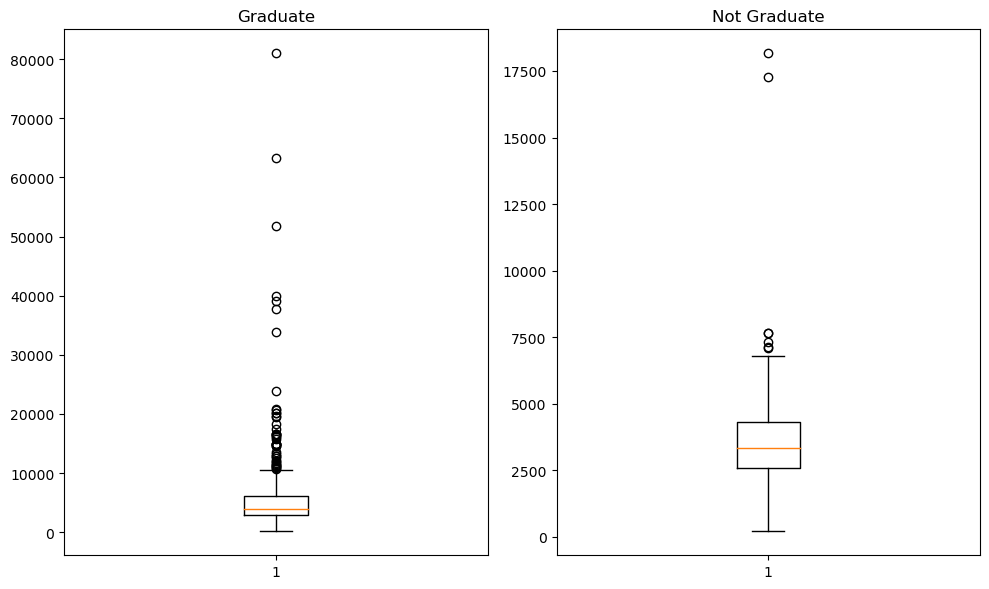

In [79]:
education_categories = df['Education'].unique()

plt.figure(figsize=(10, 6))
for i, category in enumerate(education_categories):
    plt.subplot(1, len(education_categories), i+1)
    subset = df[df['Education'] == category]
    plt.boxplot(subset['ApplicantIncome'])
    plt.title(category)

plt.tight_layout()
plt.show()

Look at the histogram and boxplot of LoanAmount

Text(0, 0.5, 'Frequency')

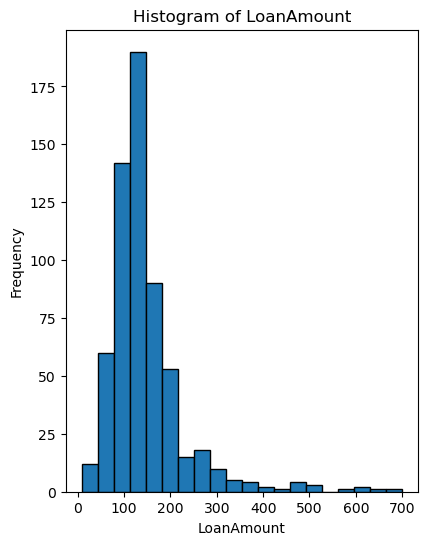

In [80]:
loan_amount = df['LoanAmount']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(loan_amount, bins=20, edgecolor='black')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')

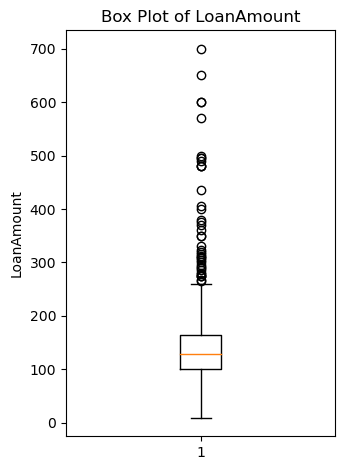

In [81]:
# Plot box plot
plt.subplot(1, 2, 2)
plt.boxplot(loan_amount)
plt.title('Box Plot of LoanAmount')
plt.ylabel('LoanAmount')

plt.tight_layout()
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [82]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\patel\AppData\Local\Temp\ipykernel_4360\1235260.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


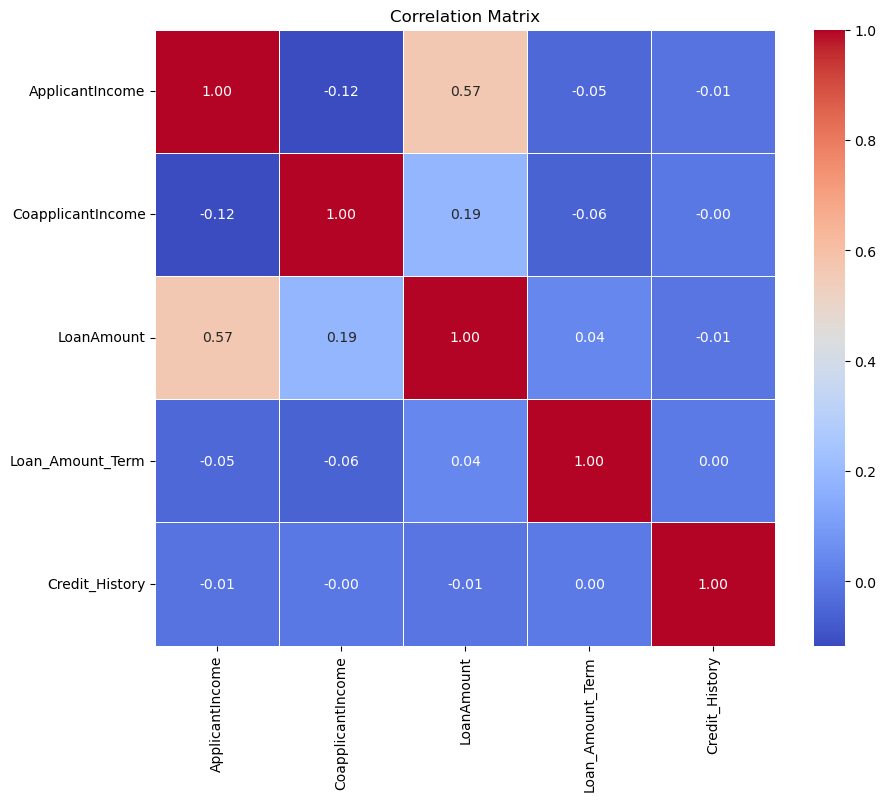

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [83]:
df1 = df[df['Loan_Status'] == "Y"]


                Loan_Status
Credit_History             
0.000000                  7
0.842199                 37
1.000000                378


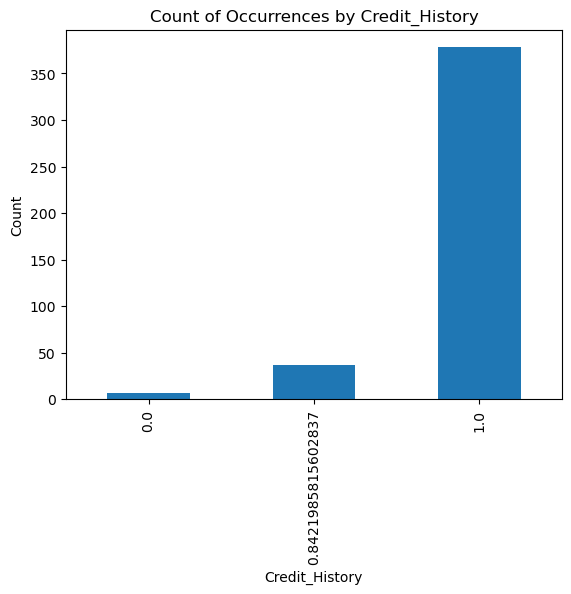

        Loan_Status
Gender             
Female           75
Male            347


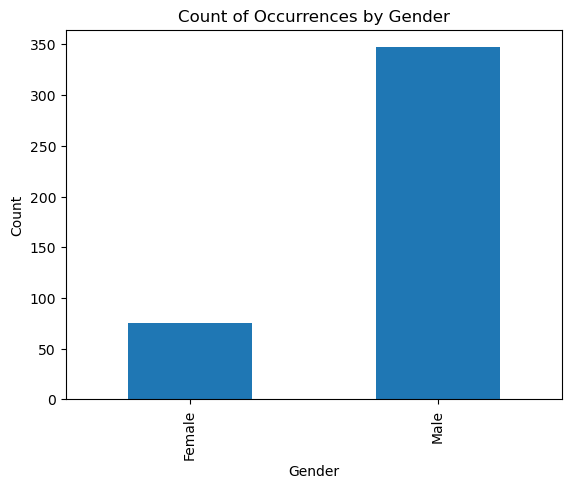

         Loan_Status
Married             
No               134
Yes              288


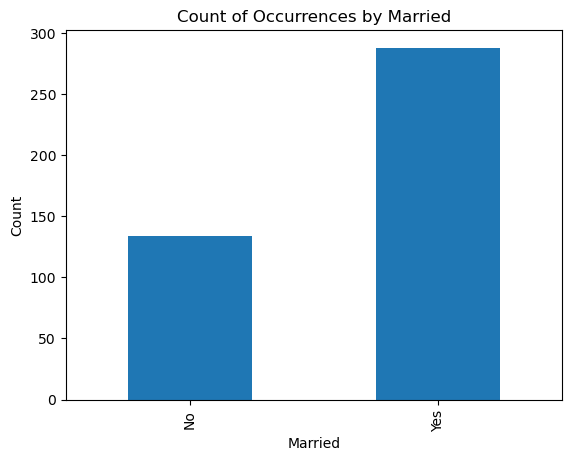

            Loan_Status
Dependents             
0                   247
1                    66
2                    76
3+                   33


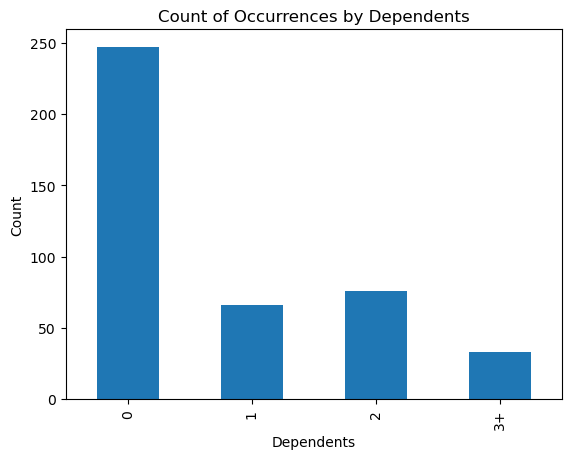

              Loan_Status
Education                
Graduate              340
Not Graduate           82


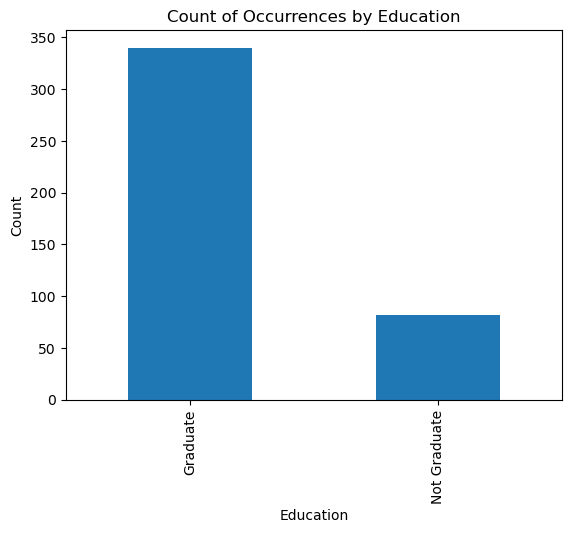

               Loan_Status
Self_Employed             
No                     366
Yes                     56


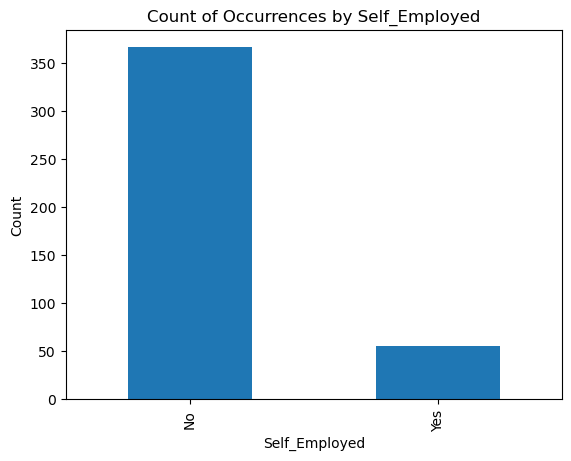

               Loan_Status
Property_Area             
Rural                  110
Semiurban              179
Urban                  133


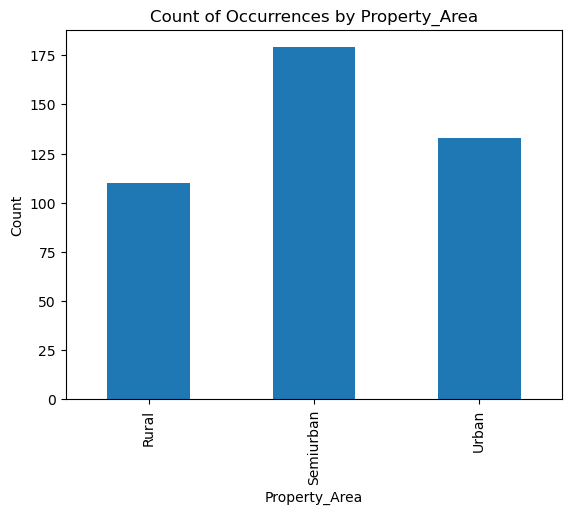

In [84]:
# Pivot table: Count of occurrences by category for each categorical column
categorical_columns = ['Credit_History','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for column in categorical_columns:
    pivot_table_count = pd.pivot_table(df1, values='Loan_Status', index=column, aggfunc='count')
    print(pivot_table_count)

    # Bar chart of the count of occurrences by category for each categorical column
    pivot_table_count.plot(kind='bar', legend=False)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Count of Occurrences by ' + column)
    plt.show()

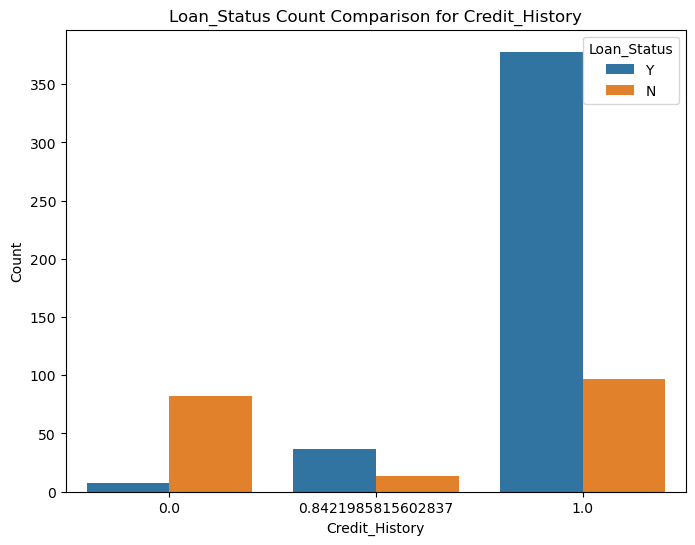

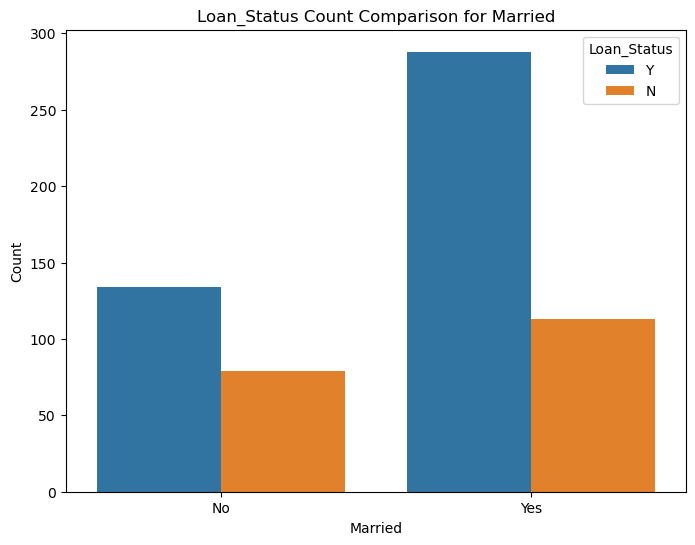

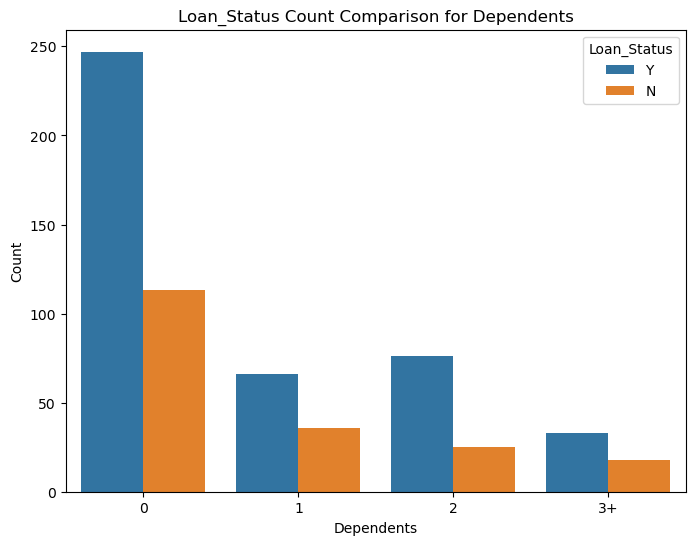

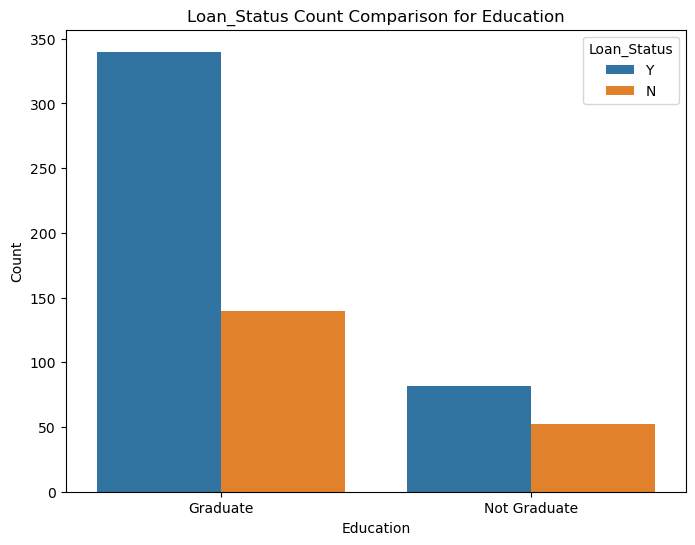

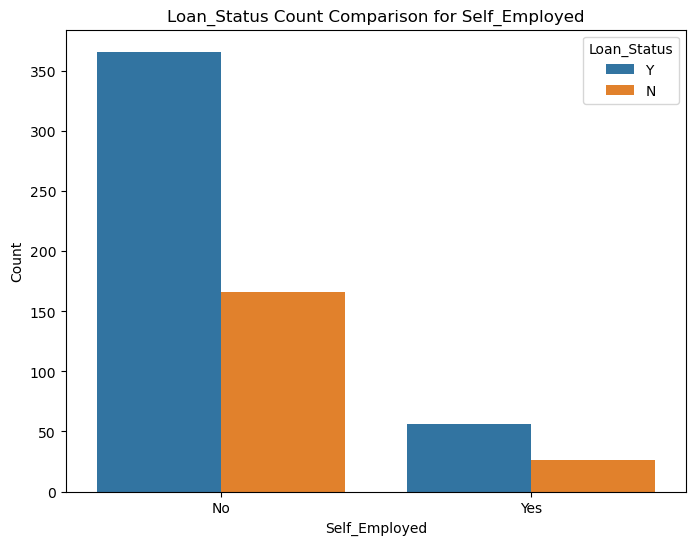

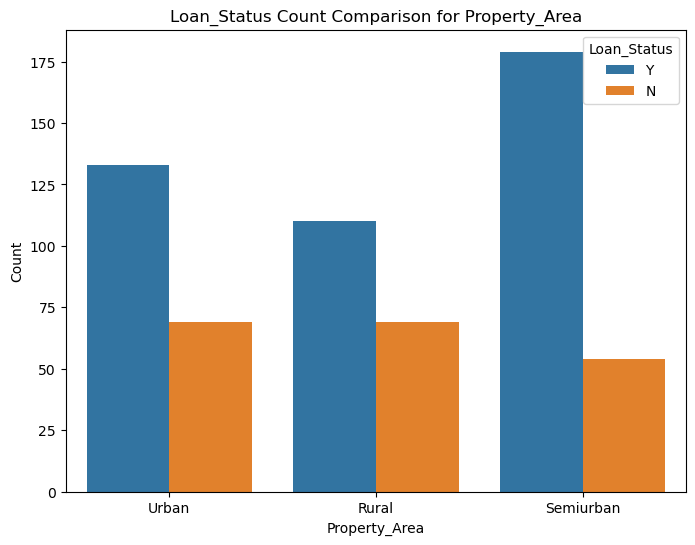

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Define the categorical columns for comparison
categorical_cols = ['Credit_History','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Create bar graphs for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'Loan_Status Count Comparison for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status', loc='upper right')
    plt.show()
    
# Save the graph as a PNG file
canvas = FigureCanvas(fig)
canvas.print_png('loan_status_by_married_F.png')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

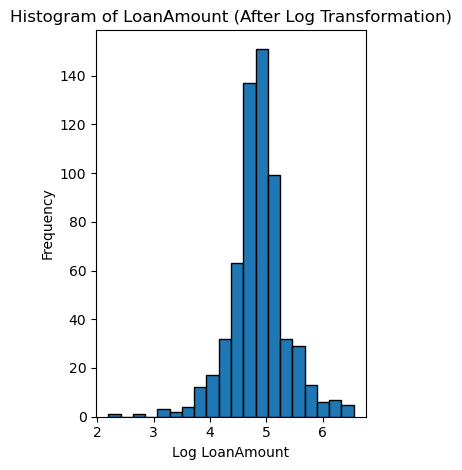

In [86]:

# Apply log transformation
df['loan_amount_log'] = np.log(df['LoanAmount'])

# Plot histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df['loan_amount_log'], bins=20, edgecolor='black')
plt.title('Histogram of LoanAmount (After Log Transformation)')
plt.xlabel('Log LoanAmount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Combine both incomes as total income and take a log transformation of the same.

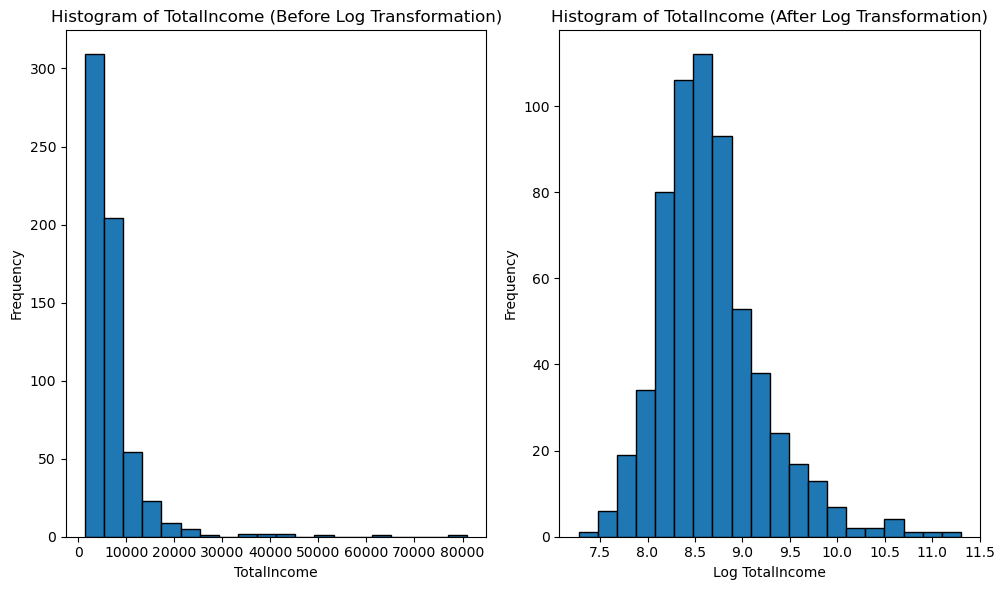

In [87]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Apply log transformation to TotalIncome
df['TotalIncome_log'] = np.log(df['TotalIncome'])

# Plot histogram of TotalIncome (Before and After log transformation)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['TotalIncome'], bins=20, edgecolor='black')
plt.title('Histogram of TotalIncome (Before Log Transformation)')
plt.xlabel('TotalIncome')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['TotalIncome_log'], bins=20, edgecolor='black')
plt.title('Histogram of TotalIncome (After Log Transformation)')
plt.xlabel('Log TotalIncome')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [88]:
# Save the graph to a file 
plt.savefig('graph.png')

<Figure size 640x480 with 0 Axes>

In [89]:

df['Loan_Amount_Term_Years'] = df['Loan_Amount_Term'] / 12

# Drop the original 'Loan_Amount_Term' column 
df.drop('Loan_Amount_Term', axis=1, inplace=True)


## 4. Building a Predictive Model

In [90]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'Loan_Status', 'loan_amount_log',
       'TotalIncome', 'TotalIncome_log', 'Loan_Amount_Term_Years'],
      dtype='object')

In [91]:
df = df.drop(['Loan_ID', 'Gender', 'Married', 
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
         'Loan_Status',
       'TotalIncome'],axis=1)

In [92]:
categorical_cols = df.select_dtypes(include='object').columns

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a subset DataFrame with only the categorical columns
df_categorical = df[categorical_cols]

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(sparse=False)

# Create a ColumnTransformer
ct = ColumnTransformer([('encoder', encoder, categorical_cols)], remainder='passthrough')

# Fit and transform the categorical columns
encoded_cols = pd.DataFrame(ct.fit_transform(df_categorical))

# Get the feature names for the encoded columns
feature_names = ct.get_feature_names_out()

# Rename the encoded columns
encoded_cols.columns = feature_names

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)


C:\Users\patel\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
df

,Credit_History,loan_amount_log,TotalIncome_log,Loan_Amount_Term_Years,encoder__Dependents_0,encoder__Dependents_1,encoder__Dependents_2,encoder__Dependents_3+,encoder__Education_Graduate,encoder__Education_Not Graduate,encoder__Self_Employed_No,encoder__Self_Employed_Yes,encoder__Property_Area_Rural,encoder__Property_Area_Semiurban,encoder__Property_Area_Urban
0,1.0,4.986426,8.674026,30.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,4.852030,8.714568,30.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,4.189655,8.006368,30.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,4.787492,8.505323,30.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,4.948760,8.699515,30.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,4.262680,7.972466,30.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,1.0,3.688879,8.320205,15.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,1.0,5.533389,9.025456,30.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,1.0,5.231109,8.933664,30.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [95]:
df.columns

Index(['Credit_History', 'loan_amount_log', 'TotalIncome_log',
       'Loan_Amount_Term_Years', 'encoder__Dependents_0',
       'encoder__Dependents_1', 'encoder__Dependents_2',
       'encoder__Dependents_3+', 'encoder__Education_Graduate',
       'encoder__Education_Not Graduate', 'encoder__Self_Employed_No',
       'encoder__Self_Employed_Yes', 'encoder__Property_Area_Rural',
       'encoder__Property_Area_Semiurban', 'encoder__Property_Area_Urban'],
      dtype='object')

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [151]:

df = pd.read_csv("C:/Users/patel/lighthouse-lab-allprojects/mini-project-IV/mini-project-IV/data/mini_project-IV.csv") 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [152]:
from sklearn.impute import SimpleImputer
# Identify numeric and object columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
object_cols = df.select_dtypes(include=['object']).columns

# Impute missing values with mean for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values with mode for object columns
object_imputer = SimpleImputer(strategy='most_frequent')
df[object_cols] = object_imputer.fit_transform(df[object_cols])

In [153]:
# creating target variable
y = df['Loan_Status']
df = df.drop(['Loan_Status','Loan_ID'],axis = 1)
# Encode the target variable
y_encoded = y.map({'N': 0, 'Y': 1})

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [155]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [156]:
# own class that can be inserted to pipeline as any other sklearn object.
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


# features we want to keep for PCA
feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
# creating class object with indexes we want to keep.
raw_feats = RawFeats(feats)

In [157]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.2, random_state=42)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion

# Define the column names for categorical and numeric variables
categorical_cols = ['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Define the preprocessing steps for categorical and numeric variables
preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_cols),
    ('numeric', StandardScaler(), numeric_cols)
])

# Define the feature selection and model steps
feature_selection = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])
model = RandomForestClassifier()

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('model', model)
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'feature_selection__pca__n_components': [2, 3, 4],  # Number of principal components for PCA
    'feature_selection__kbest__k': [2, 3, 4],  # Number of top features for SelectKBest
    'model__n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'model__max_depth': [None, 5, 10]  # Maximum depth of the trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
# Encode the target variable
y_encoded = y.map({'N': 0, 'Y': 1})

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'feature_selection__kbest__k': 3, 'feature_selection__pca__n_components': 2, 'model__max_depth': 5, 'model__n_estimators': 100}
Best Score: 0.8145949288806431


In [159]:

from sklearn.metrics import r2_score

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [160]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [161]:
import pickle

In [162]:
pickle.dump( grid_search, open( "model.f", "wb" ) )

In [163]:
# load the model from disk
loaded_model =  pickle.load( open( "model.f", "rb" ) )

In [164]:
loaded_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area']),
                                                                        ('numeric',
                                                                         StandardScaler(),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History'])])),
                                       ('feature_selection',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                                                       ('kbest',
                                                                        SelectKBest())])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'feature_selection__kbest__k': [2, 3, 4],
                         'feature_selection__pca__n_components': [2, 3, 4],
                         'model__max_depth': [None, 5, 10],
                         'model__n_estimators': [100, 200, 300]})

In [165]:
loaded_model# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Print the predicted labels
print(predictions)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [166]:
first_row = df.iloc[0]

In [167]:
json_data = first_row.to_json()

In [168]:
import json

# Convert string to JSON
json_data = json.loads(json_data)


In [169]:
json_data

{'Gender': 'Male',
 'Married': 'No',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 5849.0,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 146.4121621622,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}

In [173]:
import requests
URL = "http://127.0.0.1:5000/status"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [174]:
r

<Response [200]>

In [175]:
print(r.json())

['Yes']
